In [90]:
# Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#loading the data

file_path= "diamonds.csv"

diamonds= pd.read_csv(file_path ,index_col=[0])

diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


How is the dataset structured, and what are the main data types of each column?

In [91]:
# Getting familiar with the data structure

print(diamonds.info())

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB
None


What is the overall distribution of diamond prices?

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64


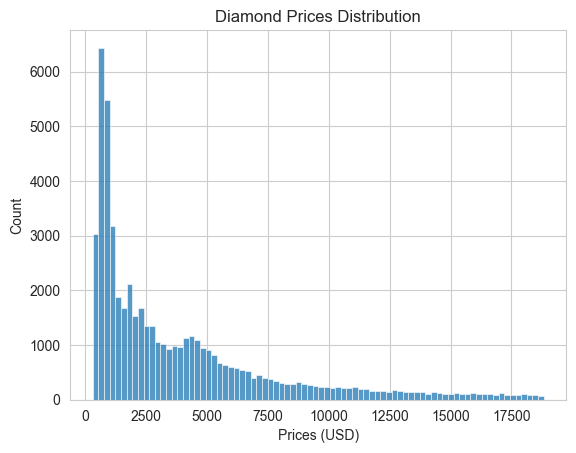

In [92]:
print(diamonds['price'].describe())
sns.set_style('whitegrid')
sns.histplot(diamonds['price'])

plt.title('Diamond Prices Distribution')
plt.xlabel('Prices (USD)')
plt.ylabel('Count')
plt.show()

### Comment

The Distribution is **right skewed** which means most diamonds fall within the lower price region. Also the distribution has a mean of about **3932 USD** and a huge Standard deviation of **3989 USD**. This might indicate that a median is a more reliable measure of central dendency with this distribution since it is less affected by extreme values resulting from the distribution skewness

Which 10 diamonds have the highest price, and what is their cut quality?

In [93]:
diamonds_sorted_price= diamonds.sort_values('price', ascending=False)
expensive_diamonds_cut= diamonds_sorted_price.iloc[:10][['carat', 'price', 'cut']]
expensive_diamonds_cut.columns= ['Carat', 'Price (USD)', 'Cut Quality']
expensive_diamonds_cut['price_per_carat']= round(expensive_diamonds_cut['Price (USD)'] / expensive_diamonds_cut['Carat'], 2)
expensive_diamonds_cut= expensive_diamonds_cut[['Cut Quality', 'Carat', 'Price (USD)', 'price_per_carat']]

print(expensive_diamonds_cut.reset_index(drop=True))


  Cut Quality  Carat  Price (USD)  price_per_carat
0     Premium   2.29        18823          8219.65
1   Very Good   2.00        18818          9409.00
2       Ideal   1.51        18806         12454.30
3       Ideal   2.07        18804          9084.06
4   Very Good   2.00        18803          9401.50
5     Premium   2.29        18797          8208.30
6     Premium   2.04        18795          9213.24
7     Premium   2.00        18795          9397.50
8     Premium   1.71        18791         10988.89
9       Ideal   2.15        18791          8740.00


How many diamonds are priced below the average price, and what is their average carat weight?

In [94]:
diamonds_low_price= diamonds[diamonds['price'] < diamonds['price'].mean()]
low_price_count= len(diamonds_low_price)
avg_carat_weight= diamonds_low_price['carat'].mean()

print(f"There are {low_price_count} diamonds priced below the average price and their average carat weight is {round(avg_carat_weight, 4)}")

There are 34283 diamonds priced below the average price and their average carat weight is 0.5093


How does the relationship between carat and price vary by diamond cut?

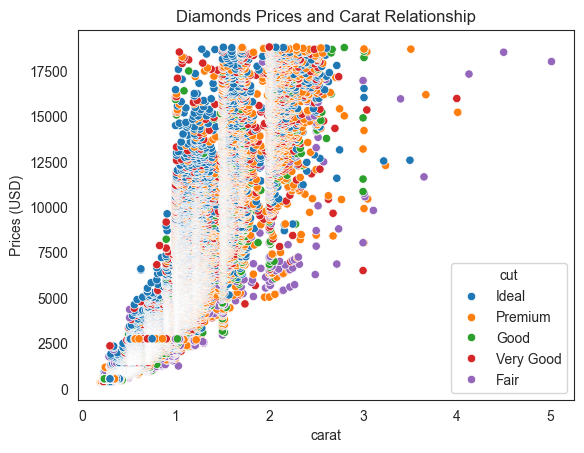

<Figure size 640x480 with 0 Axes>

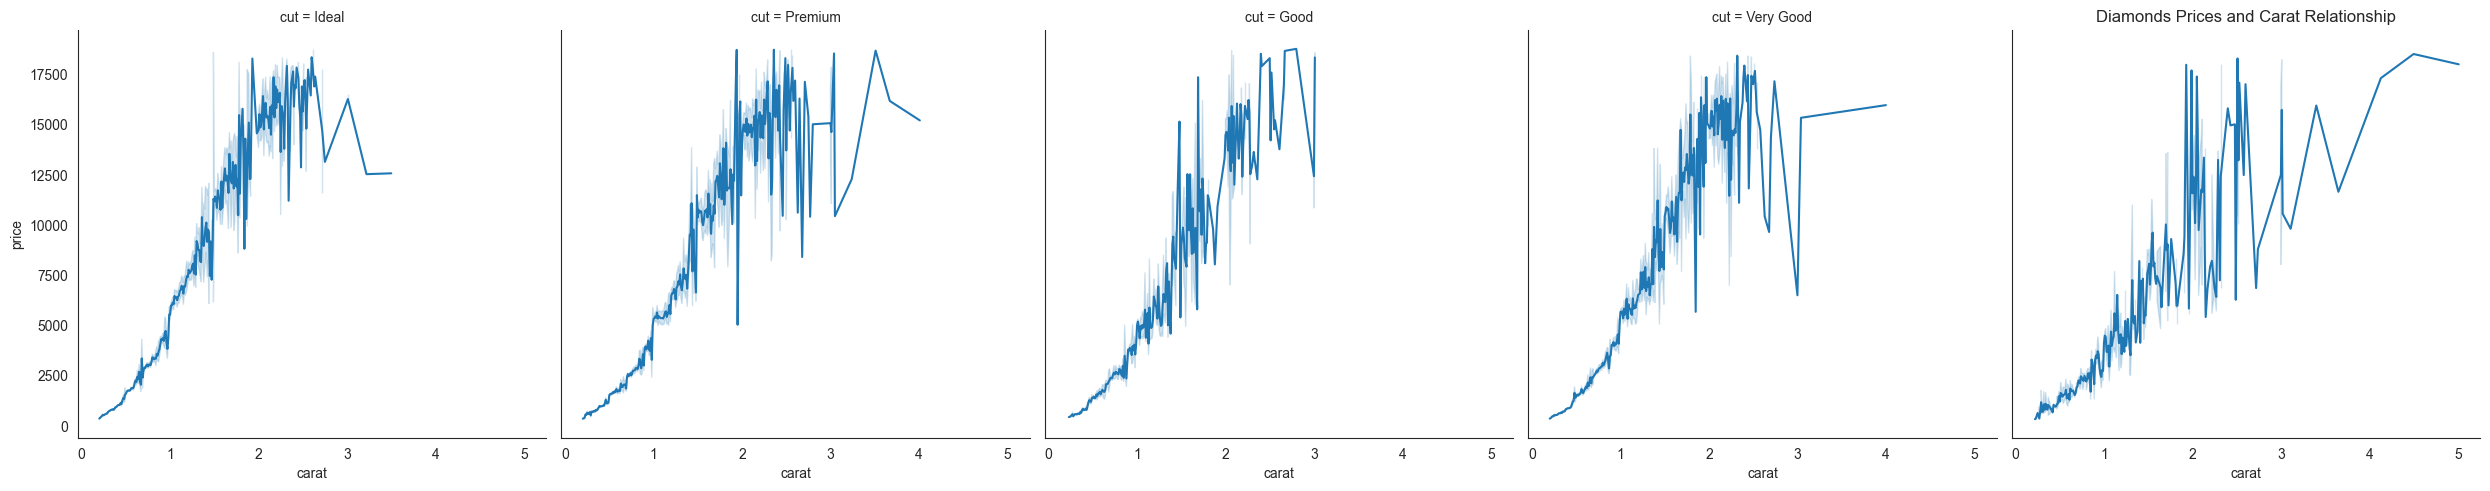

In [95]:

sns.set_style('white')
sns.scatterplot(data=diamonds,
                x='carat',
                y='price',
                hue='cut')

plt.title('Diamonds Prices and Carat Relationship')
plt.xlabel('carat')
plt.ylabel('Prices (USD)')
plt.show()

plt.clf()
sns.relplot(data=diamonds,
                x='carat',
                y='price',
                kind= 'line',
                col='cut',)

plt.title('Diamonds Prices and Carat Relationship')
plt.xlabel('carat')
plt.ylabel('Prices (USD)')
plt.show()


What are the 5 most common carat weights, and how much do diamonds in each category typically cost?

In [96]:
top_5_carats= diamonds.groupby('carat')['price']\
                        .agg(['count', 'mean'])\
                        .sort_values('count', ascending=False)\
                        .iloc[:5]



print(top_5_carats.round(2))

       count     mean
carat                
0.30    2604   680.30
0.31    2249   708.24
1.01    2242  5506.78
0.70    1981  2516.07
0.32    1840   720.14


Identifying High-Quality Diamonds

Which diamonds are of “Premium” cut and have a carat weight of at least 1.5, but cost less than 5000?

In [97]:
quality_diamonds= diamonds.query('cut== "Premium" & carat>=1.5 & price<5000')

print(quality_diamonds)

       carat      cut color clarity  depth  table  price     x     y     z
3768    1.50  Premium     H      I1   60.1   57.0   3457  7.40  7.28  4.42
4129    1.52  Premium     I      I1   61.2   58.0   3541  7.43  7.35  4.52
4339    1.50  Premium     H      I1   61.1   59.0   3599  7.37  7.26  4.47
5217    1.50  Premium     D      I1   62.4   60.0   3780  7.37  7.19  4.54
5413    1.52  Premium     G      I1   61.7   58.0   3820  7.43  7.34  4.56
6305    1.50  Premium     H      I1   62.9   60.0   4022  7.31  7.22  4.57
6349    1.50  Premium     E      I1   61.5   58.0   4032  7.38  7.20  4.50
6669    1.50  Premium     F      I1   62.6   57.0   4096  7.33  7.21  4.55
6939    1.50  Premium     G      I1   60.4   55.0   4140  7.40  7.32  4.45
8101    1.52  Premium     G      I1   62.3   60.0   4345  7.34  7.28  4.56
8418    1.51  Premium     H      I1   60.9   56.0   4404  7.38  7.26  4.46
8698    1.58  Premium     I      I1   60.2   61.0   4459  7.55  7.51  4.53
11301   1.54  Premium    

How strongly do various features (carat, depth, table) correlate with price?

          price     carat     depth     table
price  1.000000  0.921591 -0.010647  0.127134
carat  0.921591  1.000000  0.028224  0.181618
depth -0.010647  0.028224  1.000000 -0.295779
table  0.127134  0.181618 -0.295779  1.000000


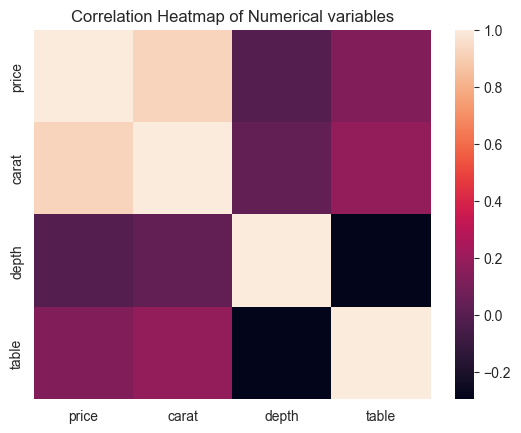

In [98]:
diamonds_corr= diamonds[['price', 'carat', 'depth', 'table']].corr()

print(diamonds_corr)

sns.heatmap(data=diamonds_corr)
plt.title('Correlation Heatmap of Numerical variables')
plt.show()

### Comment

The carat variable has the strongest positive relationship with price with a pearson correlation coefficient of 0.9215. This relationship migght be as a result of the fact that diamonds value depend majorly on their weight.

 How does the average price differ between diamonds of different clarity grades?

In [99]:
diamond_clarity= diamonds.groupby('clarity')['price']\
                        .agg('mean')\
                        .sort_values(ascending=False)
print(diamond_clarity.round(2))

clarity
SI2     5063.03
SI1     3996.00
VS2     3924.99
I1      3924.17
VS1     3839.46
VVS2    3283.74
IF      2864.84
VVS1    2523.11
Name: price, dtype: float64


Are there any diamonds with extreme values for both price and carat, and how do they compare to the rest of the dataset?

Summary statistics of Outlier Diamonds based on Price
             carat        depth        table         price            x  \
count  3540.000000  3540.000000  3540.000000   3540.000000  3540.000000   
mean      1.855528    61.661158    57.959915  14943.048305     7.841011   
std       0.360354     1.455934     2.246442   1986.430051     0.563934   
min       1.000000    56.200000    50.000000  11886.000000     0.000000   
25%       1.530000    60.800000    56.000000  13170.500000     7.430000   
50%       2.000000    61.800000    58.000000  14731.500000     7.960000   
75%       2.060000    62.500000    59.000000  16616.250000     8.210000   
max       5.010000    70.600000    95.000000  18823.000000    10.740000   

                 y            z  
count  3540.000000  3540.000000  
mean      7.845506     4.825427  
std       1.020991     0.397660  
min       0.000000     0.000000  
25%       7.440000     4.580000  
50%       7.950000     4.890000  
75%       8.190000     5.050000 

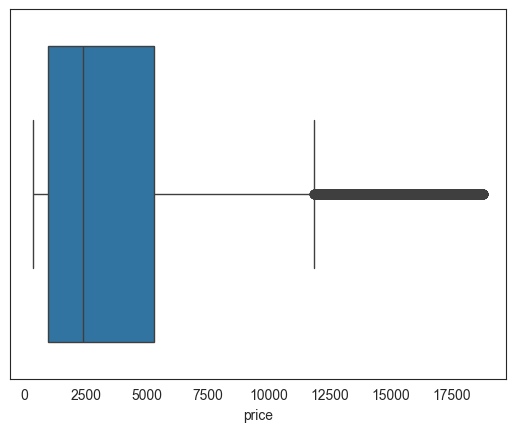

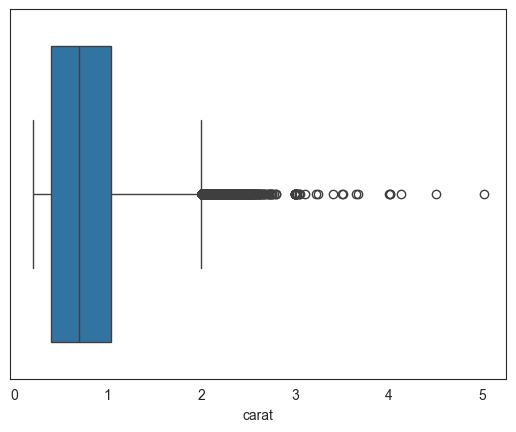

In [101]:
def outliers(df, column):
    Q1= np.quantile(df[column], 0.25)
    Q3= np.quantile(df[column], 0.75)
    IQR= Q3 - Q1
    lower_threshold= Q1 - 1.5 * IQR
    upper_threshold= Q3 + 1.5 * IQR
    outliers= df[(df[column] < lower_threshold) | (df[column] > upper_threshold)]
    return outliers


outliers_price= outliers(diamonds, 'price')
outliers_carat= outliers(diamonds, 'carat')


print("Summary statistics of Outlier Diamonds based on Price")
print(outliers_price.describe())
print("Summary statistics of Outlier Diamonds based on Carat")
print(outliers_carat.describe())
print("Summary statistics for the rest data")
print(~(diamonds.reset_index()['index'].isin(list(outliers_price.index) + list(outliers_carat.index))))


sns.boxplot(data=diamonds,
            x='price')

plt.show()

plt.clf()

sns.boxplot(data=diamonds,
            x='carat')

plt.show()